# Predicción de precios para inmuebles

**Comision:**48610

**Alumno:** Diego Blanco

# Sobre el Dataset seleccionado (Abstract)


Por su tamaño ha sido filtrado previamente, el dataset original es de la pagina oficial de [propetari](https://www.properati.com.ar/data) dejando unicamente inmuebles del tipo PH de la Ciudad de Buenos Aires.

**Las motivaciones** que me llevaron a elegir este dataset son muy concretas, estoy evaluando seriamente mudarme de casa junto a mi familia, creo que es una oportunidad unica para analizar estadisticamente y cientificamente el nogocio inmobiliario y conocer de primera mano la formacion de los precios.

Por el motivo precedente es que busque un set de datos que contuviera informacion que me ayude a tomar una buena decision y así llegue a Properati Data, que es la división de datos de Properati, un sitio de búsqueda de inmuebles de Latinoamérica. Dicha division pone a disposicion distintos datasets de avisos de venta y alquiler de inmuebles de países como Colombia, Venezuela, Peru, Uruguay y Argentina.

**La audiencia** prevista para el presente trabajo no requiere tener conocimientos de la industria inmobiliaria, se intentará bajar a lo más simple las conclusiones para que cualquier persona que quiera comprar un/a depto/casa/ph pueda entender las conclusiones que sacaremos en base a los datos analizados.

Para este trabajo particular se decicio seleccionar el dataset de Argentina, y para realizar un trabajo más acotado el mismo se filtro para trabajar unicamente con avisos de la region Ciudad de Buenos Aires.





## Contexto inmobiliario nacional

**Después de 4 años de caída, el precio de las propiedades en la Ciudad ya habría llegado a su piso**

*En los últimos cuatro meses las cotizaciones descendieron apenas un 1%, cifra que alineta mejores perspectivas. El valor promedio en la CABA es de USD 2.193 por metro cuadrado....*


ref: [Nota Infobae](https://www.infobae.com/economia/2023/02/04/despues-de-4-anos-de-caida-el-precio-de-las-propiedades-en-la-ciudad-ya-habria-llegado-a-su-piso/#:~:text=Se%20calcula%20que%20desde%202018,USD%202.193%20por%20metro%20cuadrado.)






## Diccionario de Datos

*   type - Tipo de aviso (Propiedad, Desarrollo/Proyecto).
*   country - País en el que está publicado el aviso (Argentina, Uruguay, Colombia, Ecuador, Perú)
*   id - Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja.
*   start_date - Fecha de alta del aviso.
*   end_date - Fecha de baja del aviso.
*   created_on - Fecha de alta de la primera versión del aviso.
*   lat - Latitud.
*   lon - Longitud.
*   l1 -  país.
*   l2 - provincia.
*   l3 - barrio.
*   operation - Tipo de operación (Venta, Alquiler).
*   type - Tipo de propiedad (Casa, Departamento, PH).
*   rooms - Cantidad de ambientes (útil en Argentina).
*   bedrooms - Cantidad de dormitorios (útil en el resto de los países).
*   bathrooms - Cantidad de baños.
*   surface_total - Superficie total en m².
*   surface_covered - Superficie cubierta en m².
*   price - Precio publicado en el anuncio.
*   currency - Moneda del precio publicado.
*   price_period - Periodo del precio (Diario, Semanal, Mensual)
*   title - Título del anuncio.
*   description - Descripción del anuncio.
*   development - Campos relativos al desarrollo inmobiliario (vacío si el aviso es de una propiedad).
*   status - Estado del desarrollo (Terminado, En construcción, ...)
*   name - Nombre del desarrollo.
*   short_description - Descripción corta del anuncio.
*   description - Descripción del anuncio.


# Definición de objetivo
Se analizara el dataset con el objetivo de implementar tecnicas de Machine Learning que permitan generar un modelo que ayude a predecir el precio de un inmueble basandonos en las relaciones de las varibles dependientes con la variable objetivo (en este dataset es la columna price).
# Contexto comercial
En un mundo en donde la inmediatez es sinonimo de eficiencia, se vuelve cada día más impresindible contar con una herramienta que permita a los clientes tener la valuacion de su hogar/comercio lo antes posible. Hoy en día el proceso valuatorio de una propiedad requiere de una visita personal del tasador a la propiedad, esto requiere invertir tiempo/dinero en tareas que con el avance de la IA y el ML podrían ser realizados en minutos con un muy pequeño margen de error.
La informacion prevista para el analisis cuenta con variables que nos permitiran analizar tanto sea por ubicacion, tiempo, tamaño cada inmueble y de esta manera aproximarnos a un modelo que logre automatizar la valuacion.

# Problema comercial

Proceso lento y deficiente a la hora de tasar un inmueble, es necesaria la visita de un tasador al inmueble lo que genera un alto cuello de botella para los casos en donde sea necesario tasar varios inmuebles a la vez.

# Preguntas a responder en la EDA

Es necesario luego del analisis poder responder las siguientes preguntas:

1.  Como se comporta el precio de la oferta en relacion al tiempo?

2.   Cuales son los 3 barrios con mayor oferta de inmuebles?
3.   Cual es el comportamiento del precio en relacion a la cantidad de ambientes y el barrio del inmueble?
4.   Los precios segun la superficie se comporta de la misma manera segun el barrio?




# Data wrangling



### Importación y lectura del dataset

In [2]:
import pandas as pd

pd.set_option('display.max_columns',  None)


In [ ]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import missingno as msno


In [ ]:
archivo = '1RAS2tfDhPJTpTXH9NgFprN1gJHlnQdum'
path = 'https://drive.google.com/uc?export=download&id='+archivo
df_orig = pd.read_csv(path)

In [ ]:
df_orig.shape

(13581, 22)

<Axes: >

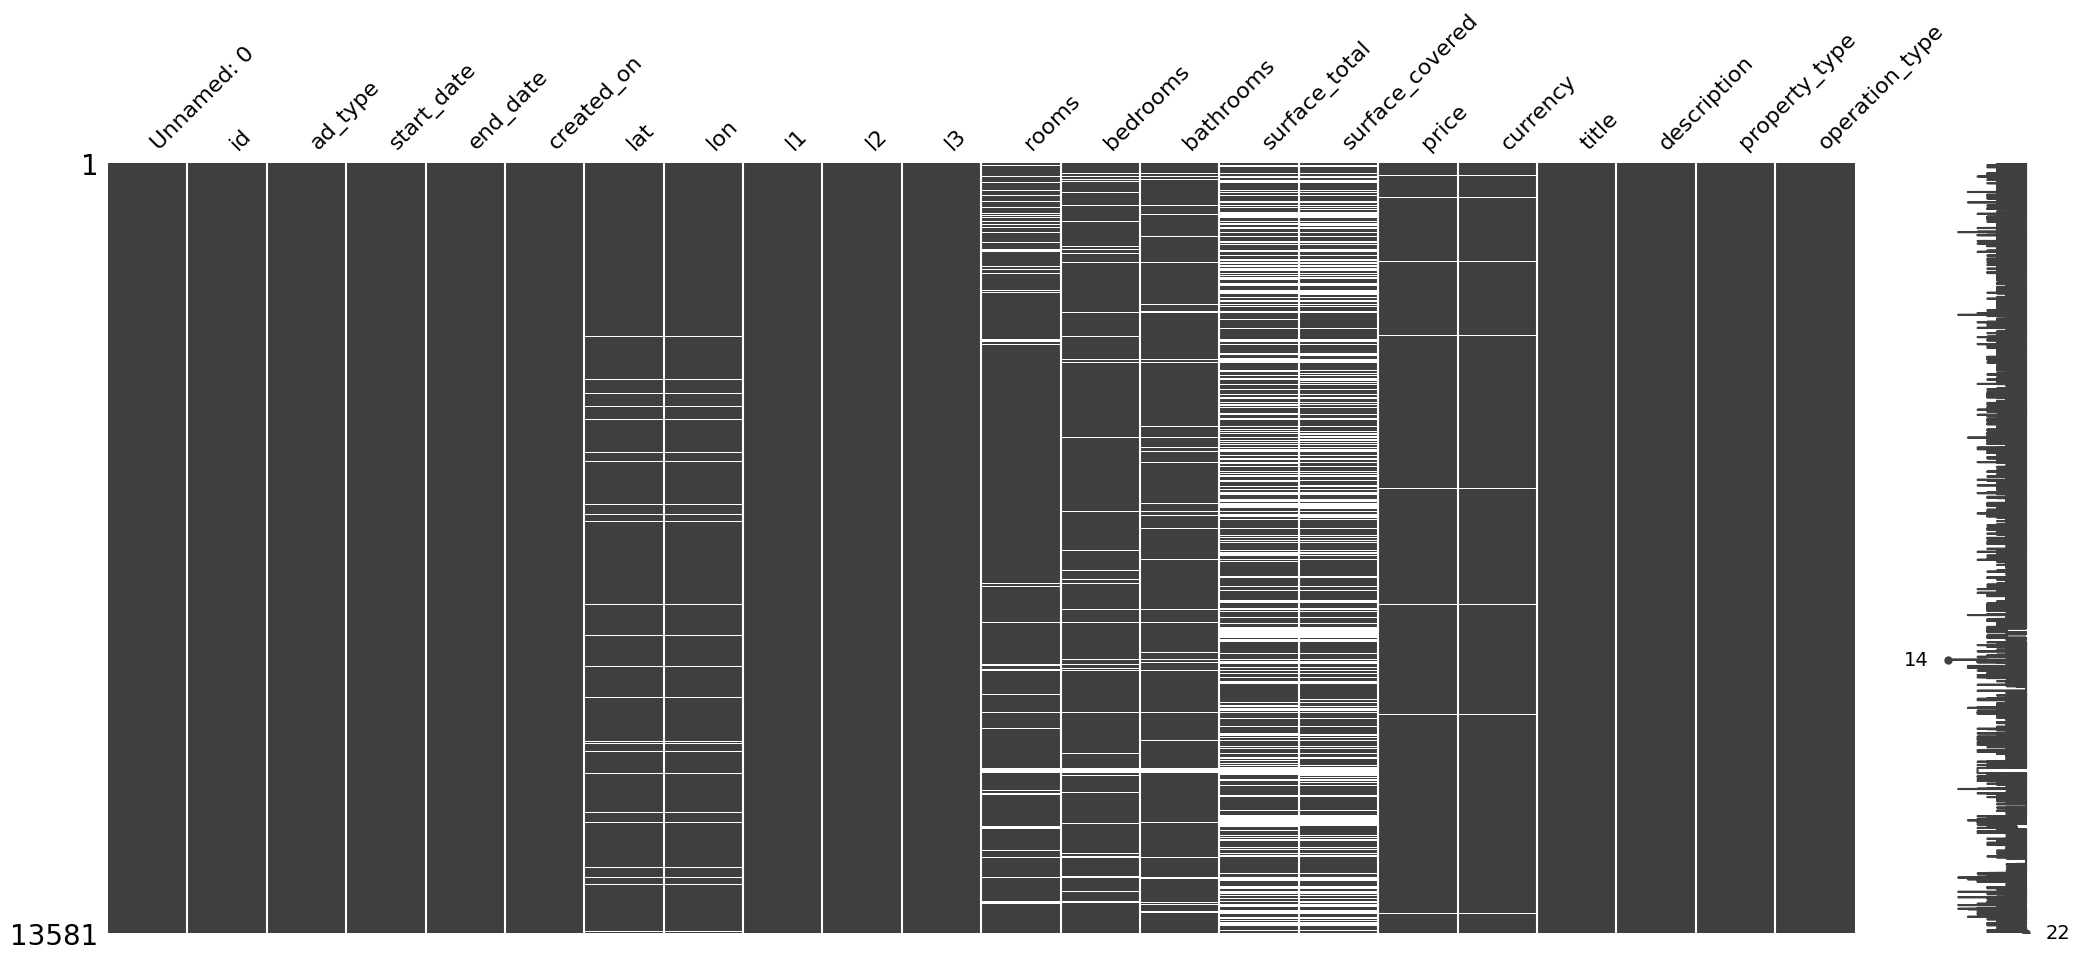

In [ ]:
#Verificamos nulos.
msno.matrix(df_orig)

### Creamos el dataframe para guardar el .csv

In [ ]:
df_inmuebles=df_orig.copy()


In [ ]:
df_inmuebles.shape

(13581, 22)

In [ ]:
df_inmuebles.head()

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,716267,StrbTWOOD11ROArsJbghiQ==,Propiedad,2021-06-17,9999-12-31,2021-06-17,-34.638818,-58.429048,Argentina,Capital Federal,Parque Chacabuco,3.0,2.0,2.0,NaN,NaN,192500.0,USD,VENTA-A ESTRENAR PH 3 AMB 2 BAÑOS FONDO Y PATI...,<b>VENTA-A ESTRENAR PH 3 AMB 2 BAÑOS FONDO Y P...,PH,Venta
1,716268,Z4sEDhsYv42grsXrZ9ubxA==,Propiedad,2021-06-17,9999-12-31,2021-06-17,-34.638818,-58.429048,Argentina,Capital Federal,Parque Chacabuco,3.0,2.0,2.0,NaN,NaN,189000.0,USD,VENTA-A ESTRENAR PH 3 AMB P.B. FTE PATIO TZA -...,<b>VENTA-A ESTRENAR PH 3 AMB P.B. FTE PATIO TZ...,PH,Venta
2,716272,vZLDZQLF4Zqic92Mjfme/A==,Propiedad,2021-06-17,2021-06-18,2021-06-17,-34.604685,-58.484070,Argentina,Capital Federal,Villa del Parque,3.0,2.0,1.0,86.0,67.0,179900.0,USD,PH Duplex Venta Villa del Parque 3 amb,Corredor Responsable: Hernan Perrone - C.U.C.I...,PH,Venta
3,716126,rqcMTn2VaKbbK6KcpVaB7w==,Propiedad,2021-06-17,9999-12-31,2021-06-17,-34.610646,-58.398574,Argentina,Capital Federal,Villa Real,3.0,2.0,2.0,NaN,NaN,165000.0,USD,"Ph en Venta en Villa real, Capital federal U$S...",Venta de Departamento 3 AMBIENTES en Villa Rea...,PH,Venta
4,716127,2xlnKykjvNe1asfCiotV6Q==,Propiedad,2021-06-17,9999-12-31,2021-06-17,-34.610646,-58.398574,Argentina,Capital Federal,Villa Real,3.0,2.0,2.0,NaN,NaN,175000.0,USD,"Ph en Venta en Villa real, Capital federal U$S...",Venta de Departamento 3 AMBIENTES en Villa Rea...,PH,Venta


## Enriquecemos el dataset con informacion de la API de la Ciudad de Buenos Aires

In [ ]:
import requests as rq

In [ ]:
# Funcion que nos devuelve la cantidad de una categoria dada proximas a la vivienda
# Recive tres parametros:
# 1: latitud
# 2: longitud
# 3: distancia de busqueda, segun el valor que pasemos buscara en ese radio una plaza

def obtener_cantidad_categoria(lat, lon, categoria, distancia):
    url = f"https://datosabiertos-catastro-apis.buenosaires.gob.ar/reverseGeocoderLugares?x={lon}&y={lat}&categorias={categoria}&radio={distancia}"
    response = rq.get(url)
    if response.status_code == 200:
        data = response.json()
        type(data)
        if isinstance(data, dict) and "total" in data:
            return data["total"]
        else:
            return None

    else:
        return None

In [ ]:
# Solo a fin de este ejercicio vamos a tomar los primeros ...
df_inmuebles_api = df_inmuebles.copy()

# Cargamos nuestro dataset con la cantidad de subtes en un radio de 500mts
df_inmuebles_api["cant_subtes"] = df_inmuebles_api.apply(lambda row: obtener_cantidad_categoria(row["lat"], row["lon"], "estaciones_de_subte",500), axis=1)

# Cargamos nuestro dataset con la cantidad de plazas en un radio de 500mts
df_inmuebles_api["cant_plazas"] = df_inmuebles_api.apply(lambda row: obtener_cantidad_categoria(row["lat"], row["lon"], "espacios_verdes_publicos",500), axis=1)



Aclaracion importante: dado que el proceso de agregar las nuevas columnas tardan aprox 2:30 hs, se corrio el proceso localmente y se guardo el df en un csv para usarlo a continuacion, se comenta el codigo original para cargar el csv resultante.

In [3]:
archivo2 = '1b_rm2o29CFONfc-xc2MBiZ4djvxIlwTT'
path = 'https://drive.google.com/uc?export=download&id='+archivo2
df_inmuebles_enriquecido = pd.read_csv(path)

In [5]:
df_inmuebles_enriquecido.shape

(13581, 24)

## Analisis de valores unicos y datos faltantes

In [ ]:
df_inmuebles_enriquecido.nunique()

Unnamed: 0         13581
id                 13581
ad_type                1
start_date           361
end_date             434
created_on           361
lat                 8017
lon                 8028
l1                     1
l2                     1
l3                    55
rooms                 24
bedrooms              23
bathrooms             11
surface_total        409
surface_covered      315
price                766
currency               2
title               8394
description        11781
property_type          1
operation_type         1
cant_subtes            8
cant_plazas           23
dtype: int64

In [ ]:
# verificamos datos nulos por columnas
df_inmuebles_enriquecido.isnull().sum()

Unnamed: 0            0
id                    0
ad_type               0
start_date            0
end_date              0
created_on            0
lat                 428
lon                 428
l1                    0
l2                    0
l3                   62
rooms               938
bedrooms            866
bathrooms           754
surface_total      4779
surface_covered    4587
price               100
currency            111
title                 0
description           0
property_type         0
operation_type        0
cant_subtes         428
cant_plazas         428
dtype: int64

In [ ]:
#Analizamos cantidades y porcentajes de nulos por columna
pd.concat([df_inmuebles_enriquecido.isnull().sum().to_frame('Cant. Nulos'), (100*df_inmuebles_enriquecido.isnull().sum()/len(df_inmuebles_enriquecido)).to_frame('% Nulos')], axis = 1)

,Cant. Nulos,% Nulos
Unnamed: 0,0,0.000000
id,0,0.000000
ad_type,0,0.000000
start_date,0,0.000000
end_date,0,0.000000
created_on,0,0.000000
lat,428,3.151462
lon,428,3.151462
l1,0,0.000000
l2,0,0.000000


In [ ]:
# Eliminamos la columna Unnamed: 0 y dejamos solamente la columna id como clave primaria
df_inmuebles_enriquecido = df_inmuebles_enriquecido.drop('Unnamed: 0', axis=1)

## Imputamos las medianas en los campos que consideramos se pueden salvar.

In [ ]:
Rooms_mean=df_inmuebles_enriquecido.rooms.mean()
Rooms_filled=df_inmuebles_enriquecido.rooms.fillna(Rooms_mean)
df_inmuebles_enriquecido['rooms']=Rooms_filled

Bedrooms_mean=df_inmuebles_enriquecido.bedrooms.mean()
Bedrooms_filled=df_inmuebles_enriquecido.bedrooms.fillna(Bedrooms_mean)
df_inmuebles_enriquecido['bedrooms']=Bedrooms_filled

Bathrooms_mean=df_inmuebles_enriquecido.bathrooms.mean()
Bathrooms_filled=df_inmuebles_enriquecido.bathrooms.fillna(Bathrooms_mean)
df_inmuebles_enriquecido['bathrooms']=Bathrooms_filled


## Creamos campos nuevos a partir de la descripcion del inmueble
Para esta entrega a modo de ejemplo solo se agregan 2 campos.

In [ ]:
def buscar_palabras_clave(descripcion):
    palabras_clave = {
        "sum": False,
        "laundry": False,
        "gimnasio": False,
        "sauna": False,
        "parrilla": False,
        "estrenar": False,
        "amenities": False
    }

    for palabra in palabras_clave.keys():
        if palabra in descripcion.lower():
            palabras_clave[palabra] = True

    return palabras_clave

In [ ]:
df_inmuebles_enriquecido["sum"] = df_inmuebles_enriquecido.apply(lambda row: buscar_palabras_clave(row["description"])["sum"], axis=1)

df_inmuebles_enriquecido["parrilla"] = df_inmuebles_enriquecido.apply(lambda row: buscar_palabras_clave(row["description"])["parrilla"], axis=1)




<Axes: >

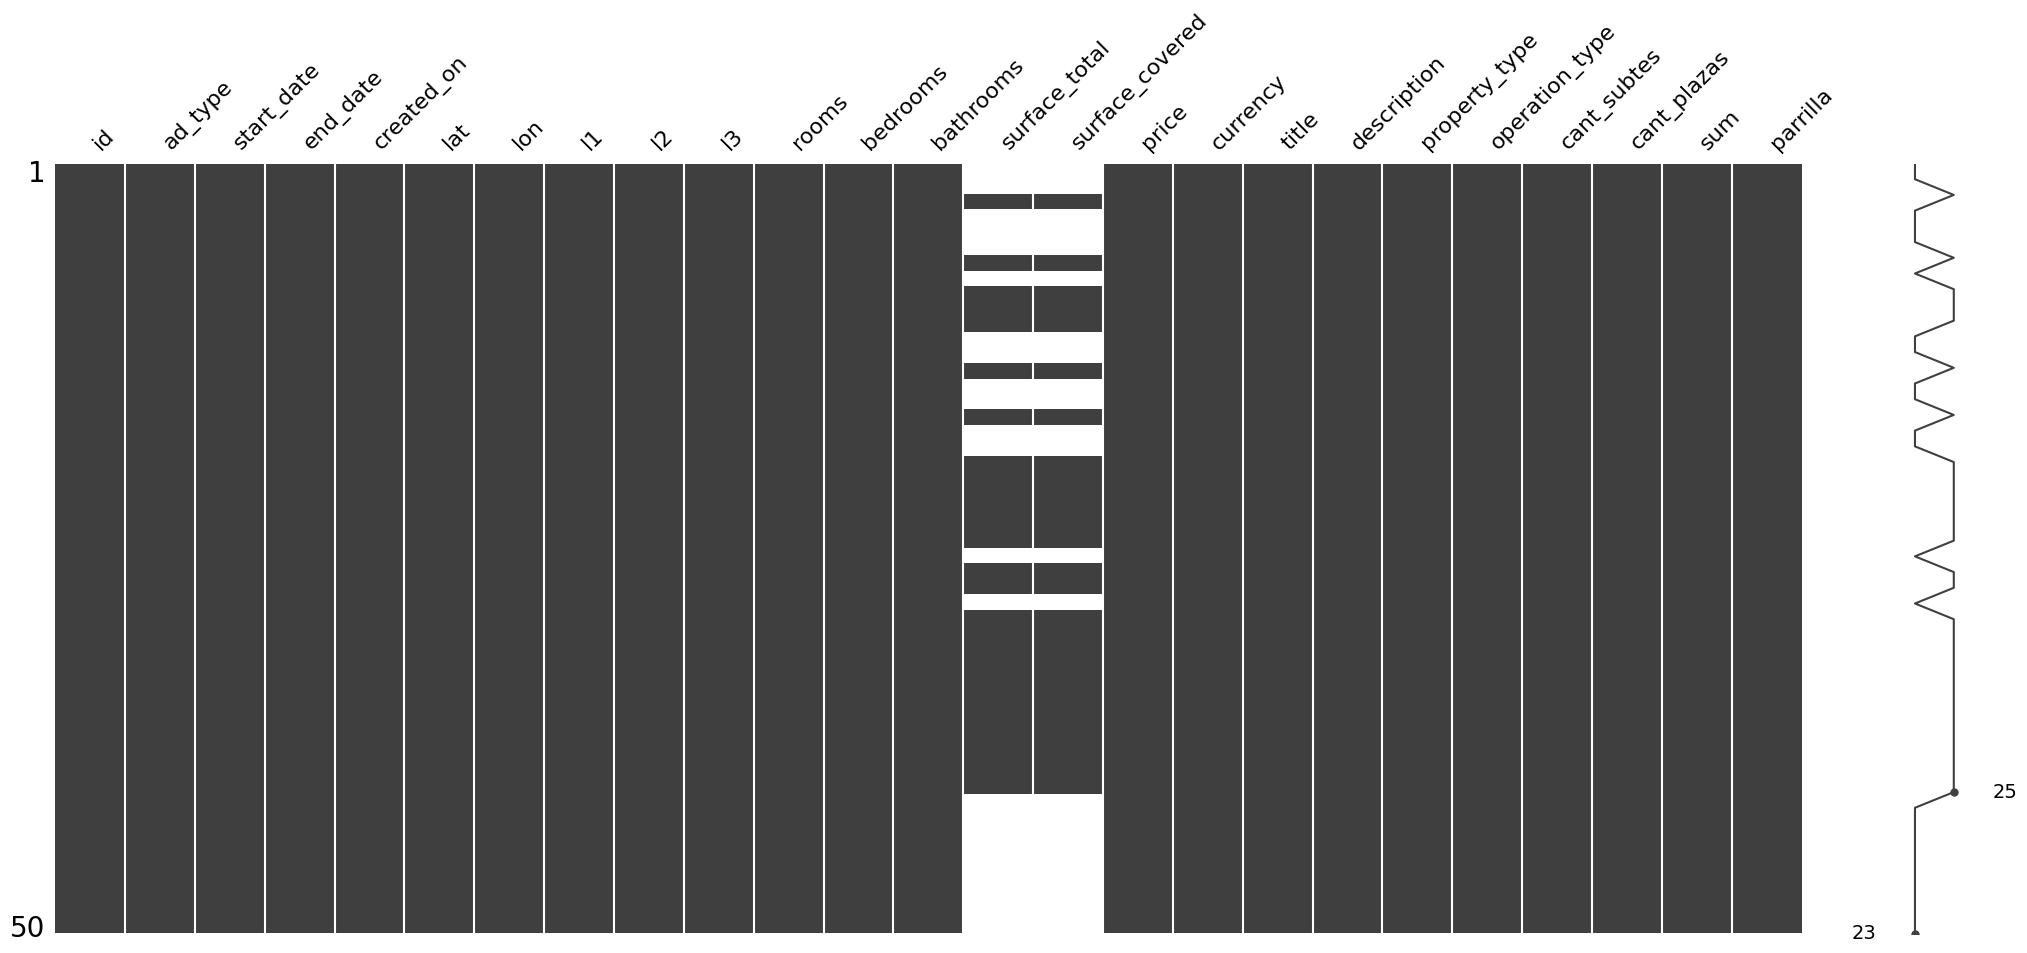

In [ ]:
msno.matrix(df_inmuebles_enriquecido)

In [ ]:
df_inmuebles_enriquecido.isnull().sum()

id                    0
ad_type               0
start_date            0
end_date              0
created_on            0
lat                 428
lon                 428
l1                    0
l2                    0
l3                   62
rooms                 0
bedrooms              0
bathrooms             0
surface_total      4779
surface_covered    4587
price               100
currency            111
title                 0
description           0
property_type         0
operation_type        0
cant_subtes         428
cant_plazas         428
sum                   0
parrilla              0
dtype: int64

## Imputamos los valores de superficie total y cubierta intercambiando sus valores en el caso de que alguno tenga null

In [ ]:
df_inmuebles_enriquecido['surface_total'].fillna(df_inmuebles_enriquecido['surface_covered'], inplace=True)

df_inmuebles_enriquecido['surface_covered'].fillna(df_inmuebles_enriquecido['surface_total'], inplace=True)


In [ ]:
df_inmuebles_enriquecido.isnull().sum()

id                    0
ad_type               0
start_date            0
end_date              0
created_on            0
lat                 428
lon                 428
l1                    0
l2                    0
l3                   62
rooms                 0
bedrooms              0
bathrooms             0
surface_total      4368
surface_covered    4368
price               100
currency            111
title                 0
description           0
property_type         0
operation_type        0
cant_subtes         428
cant_plazas         428
sum                   0
parrilla              0
dtype: int64

## Se eliminan los registros en donde creemos no es factible imputar un valor.

In [ ]:
df_inmuebles_limpio = df_inmuebles_enriquecido.dropna()

In [ ]:
df_inmuebles_limpio.isnull().sum()

id                 0
ad_type            0
start_date         0
end_date           0
created_on         0
lat                0
lon                0
l1                 0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
currency           0
title              0
description        0
property_type      0
operation_type     0
cant_subtes        0
cant_plazas        0
sum                0
parrilla           0
dtype: int64

In [ ]:
df_inmuebles_limpio.shape

(8850, 25)

## Modificamos el tipo de dato de los campos de tipo float para las variables que son enteras

In [ ]:
df_inmuebles_limpio = df_inmuebles_limpio.astype({'rooms': 'int32'})

df_inmuebles_limpio = df_inmuebles_limpio.astype({'bathrooms': 'int32'})

df_inmuebles_limpio = df_inmuebles_limpio.astype({'bedrooms': 'int32'})

In [ ]:
df_inmuebles_limpio.dtypes


id                  object
ad_type             object
start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms                int32
bedrooms             int32
bathrooms            int32
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
cant_subtes        float64
cant_plazas        float64
sum                   bool
parrilla              bool
dtype: object

In [ ]:
pd.options.display.float_format = '{:.1f}'.format
df_inmuebles_limpio.describe()


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,cant_subtes,cant_plazas
count,8850.0,8850.0,8850.0,8850.0,8850.0,8850.0,8850.0,8850.0,8850.0,8850.0
mean,-34.6,-58.5,3.5,2.4,1.5,159.5,123.7,196481.7,0.4,3.9
std,0.0,0.0,1.6,1.3,0.8,1898.2,1857.4,592537.7,0.8,3.4
min,-34.7,-58.5,1.0,1.0,1.0,1.0,1.0,10000.0,0.0,0.0
25%,-34.6,-58.5,3.0,2.0,1.0,67.0,56.0,124000.0,0.0,1.0
50%,-34.6,-58.5,3.0,2.0,1.0,100.0,76.0,165000.0,0.0,3.0
75%,-34.6,-58.4,4.0,3.0,2.0,144.0,110.0,235000.0,0.0,5.0
max,-34.5,-58.3,35.0,30.0,15.0,123000.0,123000.0,55000000.0,6.0,21.0


## Eliminamos los outliners
Para este caso particular de negocio, nos interesan analizar unicamente propiedades que se puedan comprar/vender para viviendas, por lo que se eliminan del dataframe valores que consideramos extremos para este fin.

In [ ]:
df_inmuebles_limpio = df_inmuebles_limpio[(df_inmuebles_limpio.price<=500000) & (df_inmuebles_limpio.price>30000) & (df_inmuebles_limpio.surface_total < 500) & (df_inmuebles_limpio.rooms < 10) & (df_inmuebles_limpio.bedrooms < 9)]

## Verificamos percentiles y sus valores

In [ ]:
df_inmuebles_limpio.price.describe(percentiles=[0.1*i for i in range(1,10)])


count     8625.0
mean    182176.9
std      84197.8
min      35000.0
10%      89000.0
20%     115000.0
30%     130000.0
40%     145000.0
50%     163500.0
60%     185000.0
70%     215000.0
80%     249000.0
90%     298000.0
max     500000.0
Name: price, dtype: float64

In [ ]:
pd.options.display.float_format = '{:.1f}'.format
df_inmuebles_limpio.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,cant_subtes,cant_plazas
count,8625.0,8625.0,8625.0,8625.0,8625.0,8625.0,8625.0,8625.0,8625.0,8625.0
mean,-34.6,-58.5,3.4,2.3,1.4,112.1,89.0,182176.9,0.3,3.9
std,0.0,0.0,1.2,1.0,0.7,64.1,139.3,84197.8,0.7,3.4
min,-34.7,-58.5,1.0,1.0,1.0,1.0,1.0,35000.0,0.0,0.0
25%,-34.6,-58.5,3.0,2.0,1.0,66.0,55.0,122000.0,0.0,1.0
50%,-34.6,-58.5,3.0,2.0,1.0,98.0,75.0,163500.0,0.0,3.0
75%,-34.6,-58.4,4.0,3.0,2.0,140.0,108.0,230000.0,0.0,5.0
max,-34.5,-58.3,9.0,8.0,8.0,467.0,9983.0,500000.0,6.0,21.0


<Axes: >

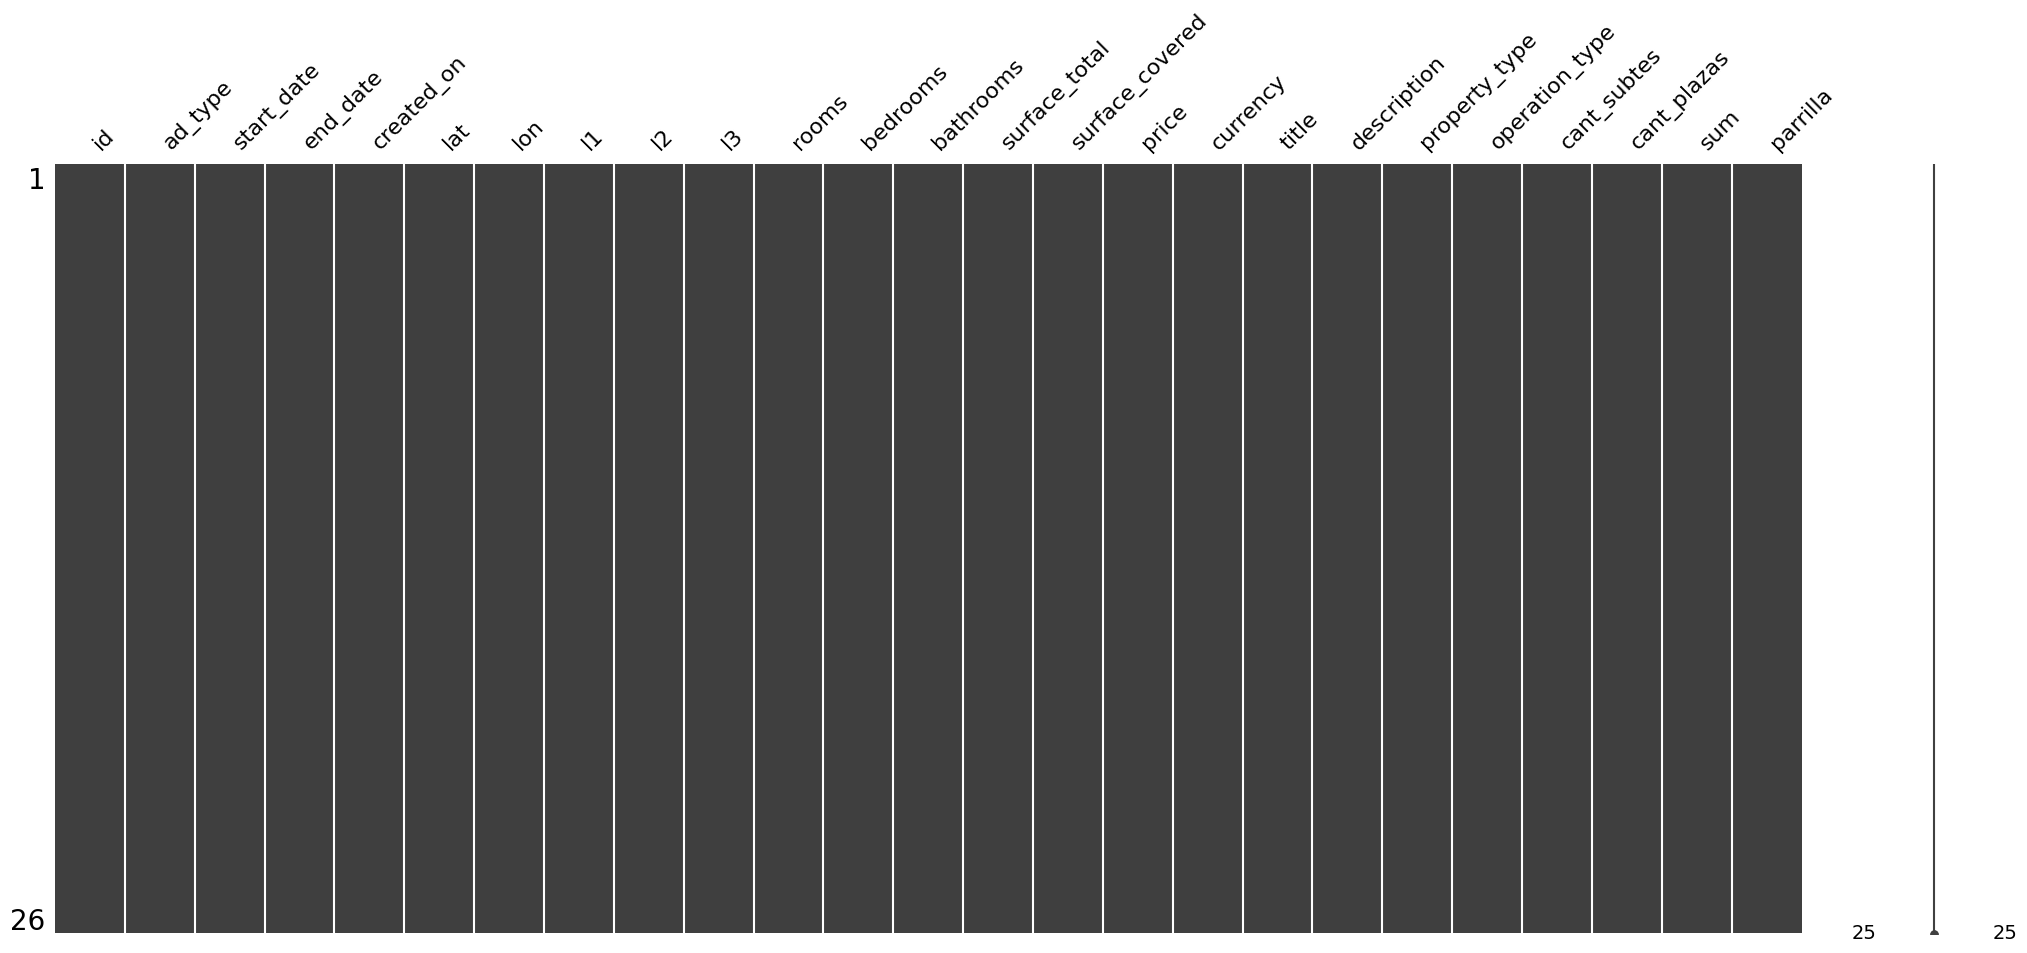

In [ ]:
msno.matrix(df_inmuebles_limpio)

# Data StoryTelling

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option('display.max_columns',  None)


Cargamos el dataset "ampliado" con la informacion de la api del gobierno de la ciudad (subtes y plazas) y además se agregan los campos de parrilla y sum, ambos booleanos, los mismos son determinados a partir del campo "description" que contiene una descripcion ampliada del inmueble.

In [4]:
archivo = '1hNj-XU7CxjWi7PTtvBvM8-wXy2r_6qot'
path = 'https://drive.google.com/uc?export=download&id='+archivo
df_inmuebles_limpio = pd.read_csv(path)

In [3]:
df_inmuebles_limpio.shape

(8625, 25)

## Verificamos la correlacion entre las variables

<ipython-input-5-794afccb68a8>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(corr_data.corr())
<ipython-input-5-794afccb68a8>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(corr_data.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket")


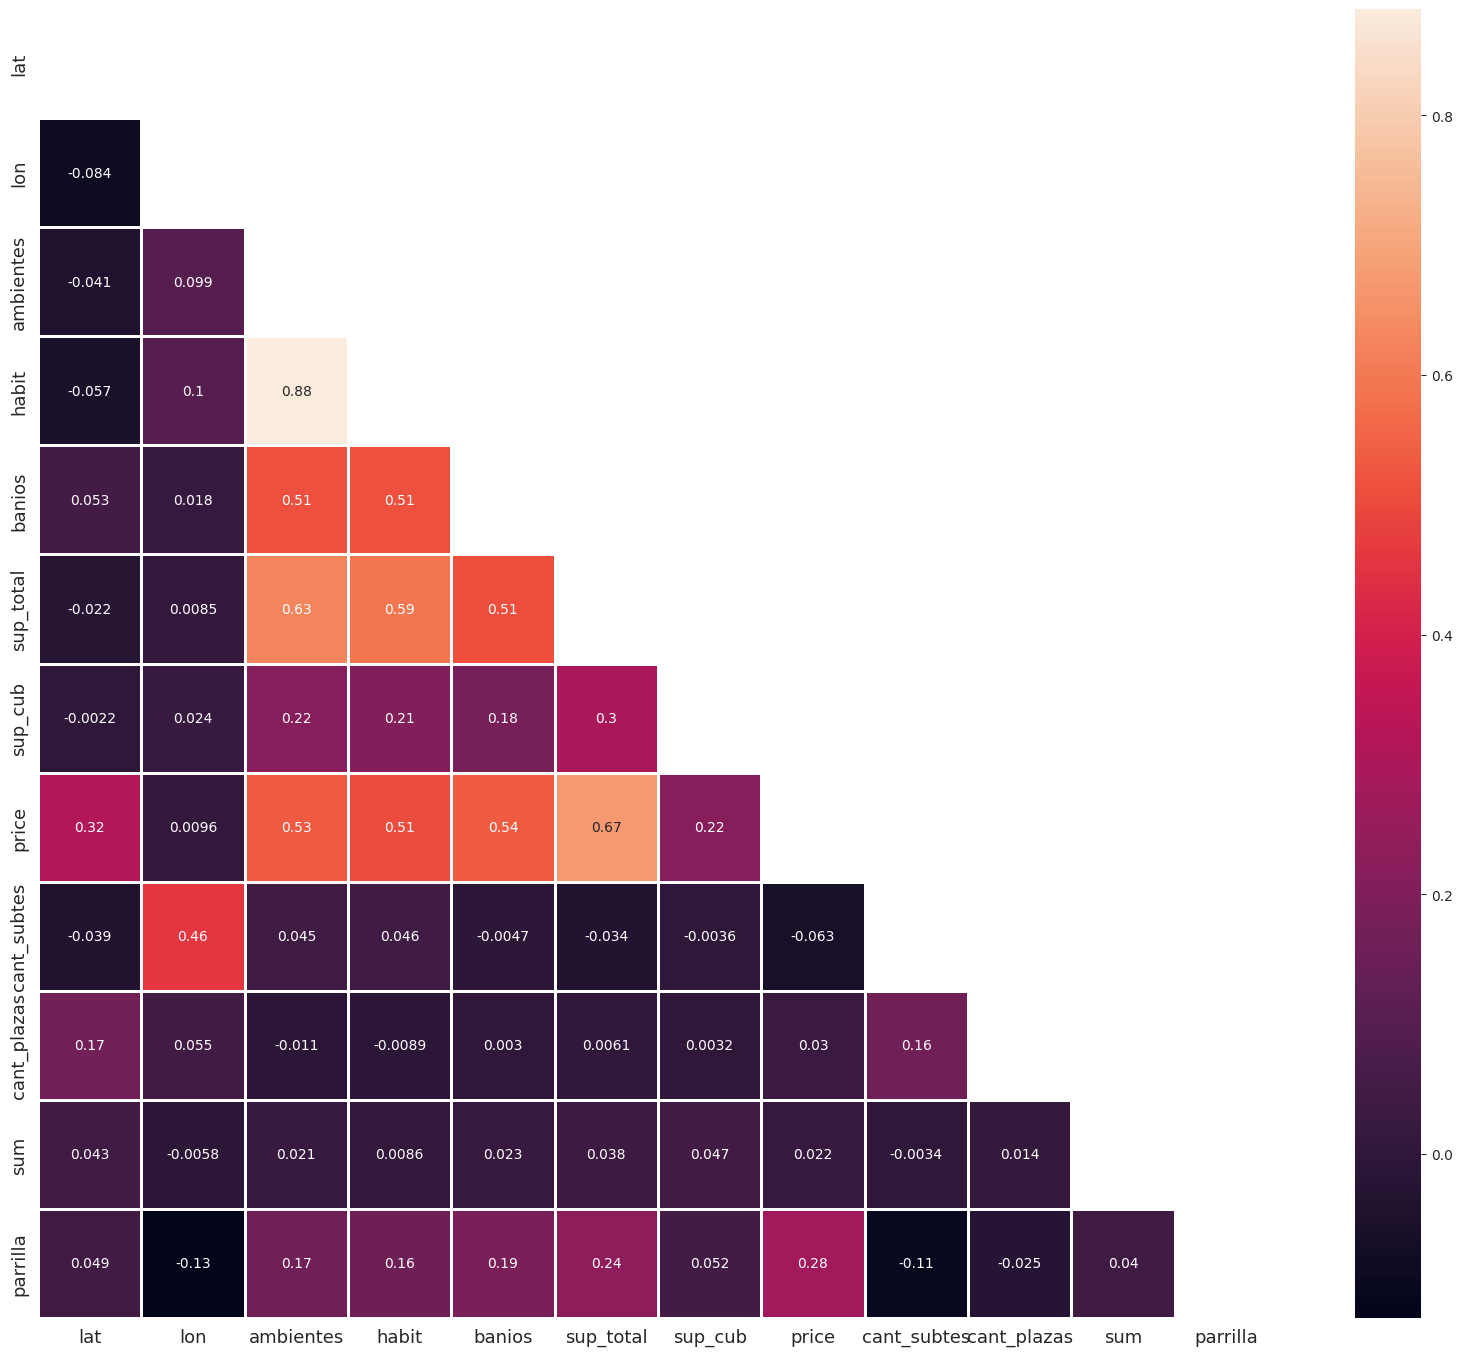

In [5]:
# modificamos algunos nombres de columnas para hacerlos más claros
df_inmuebles_limpio = df_inmuebles_limpio.rename(columns={'surface_total': 'sup_total', 'surface_covered': 'sup_cub', 'bedrooms': 'habit', 'bathrooms': 'banios', 'rooms': 'ambientes'})

corr_data = df_inmuebles_limpio.drop(['id','ad_type',	'start_date',	'end_date',	'created_on'], axis = 1)

sns.set_style("white")
sns.set_style({"axes.facecolor": "none"})

plt.figure(figsize=(20, 17))
matrix = np.triu(corr_data.corr())

# Crear el heatmap y ajustar el tamaño de fuente
ax = sns.heatmap(corr_data.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket")
ax.tick_params(axis='both', which='both', labelsize=13)

plt.show()



In [12]:
corr_matrix = corr_data.corr()
target_correlations = corr_matrix['price'].sort_values(ascending=False)
top_correlations = target_correlations[1:6]  # Considera las 5 características más correlacionadas
print(top_correlations)


sup_total    0.670273
banios       0.537985
ambientes    0.531775
habit        0.506958
lat          0.315042
Name: price, dtype: float64


<ipython-input-12-6bb144e09982>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = corr_data.corr()


## Ofertas de publicaciones por barrio en CABA

Verificamos la oferta de PHs por Barrio de la Ciudad de Buenos Aires. Destacamos los 3 barrios con mayor oferta.

<ipython-input-13-9b07eec2110a>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), fontsize=8)


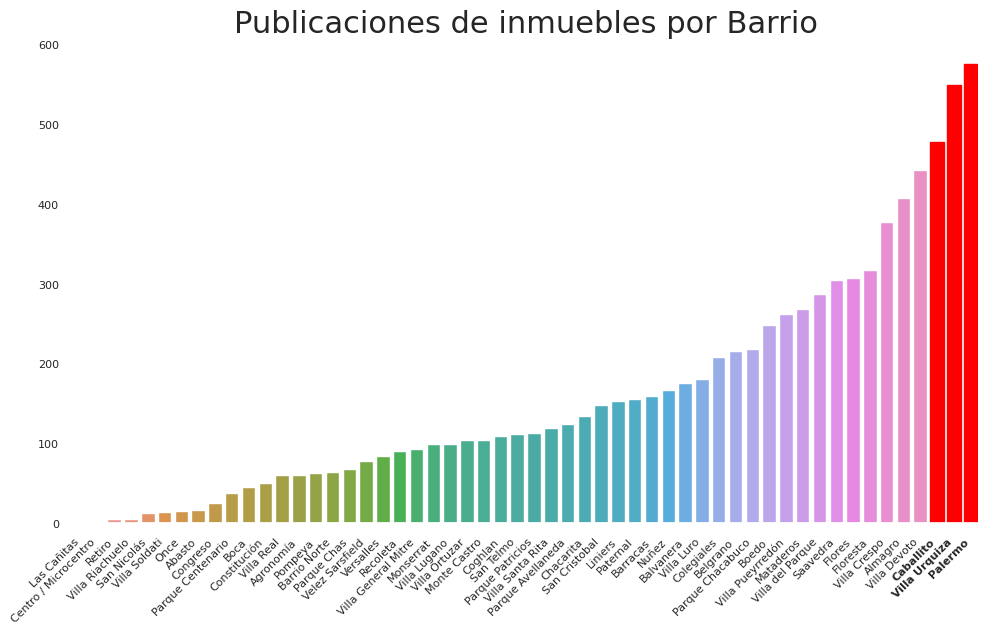

In [13]:
publicaciones_barrio = df_inmuebles_limpio.groupby('l3').id.count()
df_publicaciones_barrio = publicaciones_barrio.reset_index().sort_values(by='id', ascending=True)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize': (11.7, 6.27)})

g = sns.barplot(data=df_publicaciones_barrio, x="l3", y="id")
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right', fontsize=8)  # Etiquetas por defecto

# Obtener los tres barrios con mayor cantidad de publicaciones
top_values = df_publicaciones_barrio.nlargest(3, 'id')

# Resaltar los tres barrios y sus etiquetas
for i, bar in enumerate(g.patches):
    barrio = df_publicaciones_barrio.iloc[i]['l3']
    if barrio in top_values['l3'].values:
        bar.set_color('red')  # Cambiar color de los tres barrios con mayor cantidad de publicaciones
        g.get_xticklabels()[i].set_fontweight('bold')  # Resaltar etiquetas de los tres barrios

g.set_yticklabels(g.get_yticklabels(), fontsize=8)
g.set_title('Publicaciones de inmuebles por Barrio', fontsize=22)
g.set_xlabel('')
g.set_ylabel('')

# Eliminar color de fondo
fig = plt.gcf()
fig.patch.set_facecolor('none')
ax = plt.gca()
ax.set_facecolor('none')

plt.savefig('oferta_por_barrio.png', transparent=True, dpi=300)


## Evolucion de los precios en el tiempo

Agrupamos las ofertas mensualmente y tomamos un promedio para ver su evolucion en el tiempo.

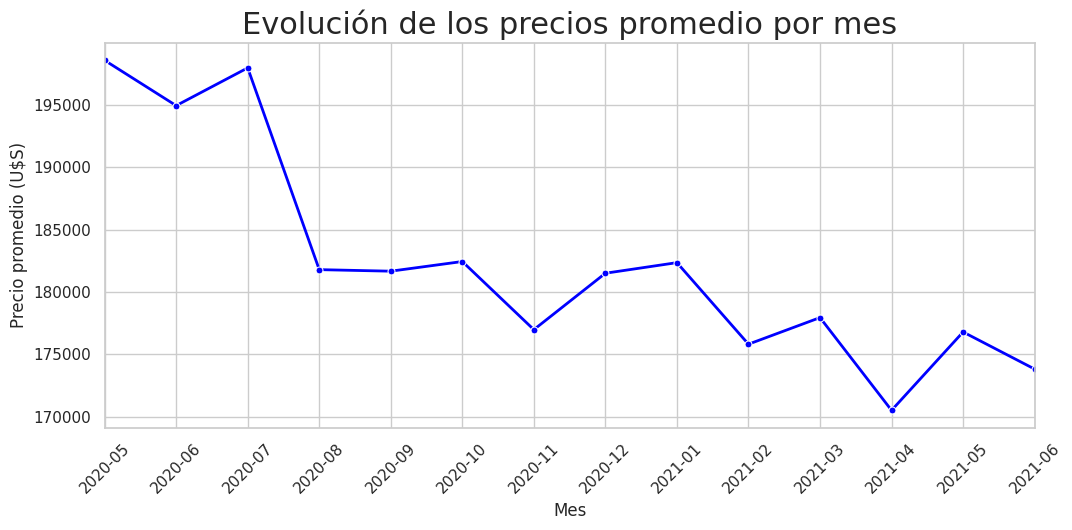

In [14]:
df_inmuebles_limpio['start_date'] = pd.to_datetime(df_inmuebles_limpio['start_date']).dt.strftime('%Y-%m')
precio_mes_media = df_inmuebles_limpio.groupby('start_date').price.mean()

# Configurar el estilo de los gráficos con Seaborn
sns.set_theme(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 5))

# Graficar la evolución de los precios promedio por mes
sns.lineplot(data=precio_mes_media, ax=ax, marker="o", markersize=5, linewidth=2, color='blue')

# Configurar los ejes y el título
ax.set_xlabel('Mes')
ax.set_ylabel('Precio promedio (U$S)')
ax.set_title('Evolución de los precios promedio por mes', fontsize=22)

# Configurar los límites de los ejes
ax.set_xlim(precio_mes_media.index.min(), precio_mes_media.index.max())

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Guardar la figura con fondo transparente y alta resolución
plt.savefig('precios_por_mes.png', transparent=True, dpi=300)

plt.show()

Analizamos los tres barrios en donde tenemos mayor oferta

In [15]:
df_palermo = df_inmuebles_limpio.loc[df_inmuebles_limpio['l3'] == 'Palermo']
df_urquiza = df_inmuebles_limpio.loc[df_inmuebles_limpio['l3'] == 'Villa Urquiza']
df_caballito = df_inmuebles_limpio.loc[df_inmuebles_limpio['l3'] == 'Caballito']

In [16]:
df_palermo = df_palermo.set_index('id')
df_urquiza = df_urquiza.set_index('id')
df_caballito = df_caballito.set_index('id')

<Figure size 1200x500 with 0 Axes>

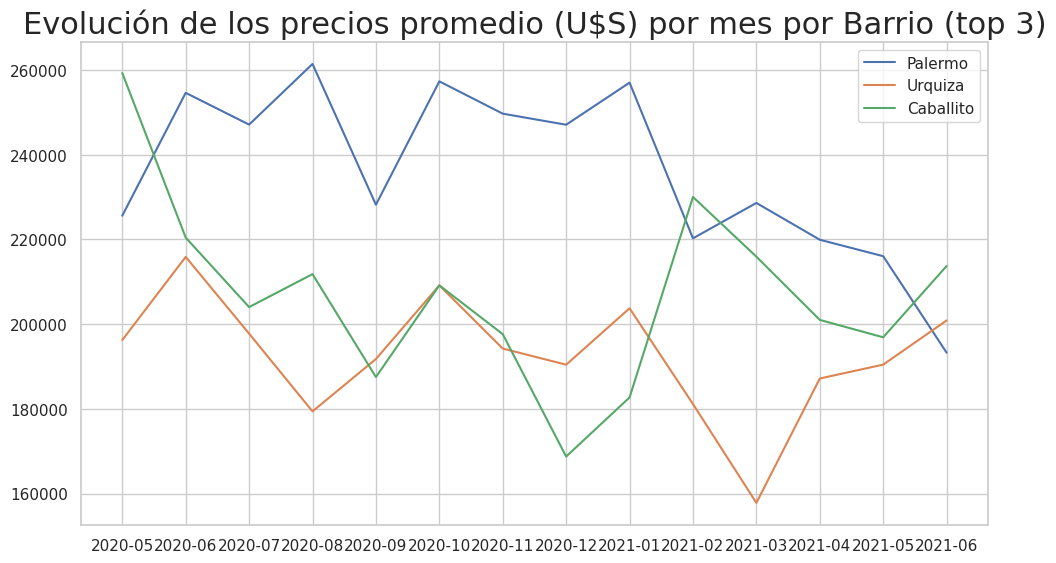

In [17]:
precio_mes_media_palermo = df_palermo.groupby('start_date').price.mean()
precio_mes_media_urquiza = df_urquiza.groupby('start_date').price.mean()
precio_mes_media_caballito = df_caballito.groupby('start_date').price.mean()
plt.figure(figsize=(12,5))
fig, ax = plt.subplots()
ax.plot(precio_mes_media_palermo.index, precio_mes_media_palermo.values, label='Palermo')
ax.plot(precio_mes_media_urquiza.index, precio_mes_media_urquiza.values, label='Urquiza')
ax.plot(precio_mes_media_caballito.index, precio_mes_media_caballito.values,label='Caballito')
ax.set_title("Evolución de los precios promedio (U$S) por mes por Barrio (top 3)",fontsize=22)
ax.legend()
plt.show()


En el grafico anterior podemos ver que Palermo tuvo un marcado descenso en el precio de las propiedades que no logra recuperarse, este descenso lo situa por debajo de los dos barrios que lo seguian en cantidad de anuncios, podría existir una sobre demanda en este barrio?

## Distribucion de los precios por barrio

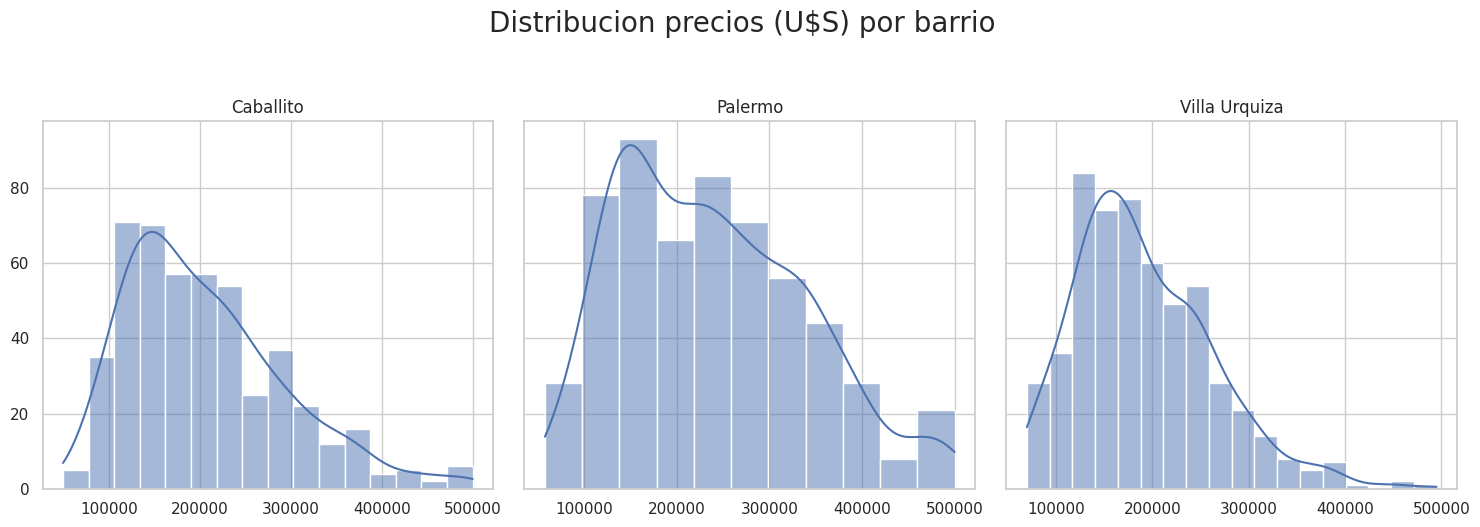

In [18]:
barrios = ['Caballito', 'Palermo', 'Villa Urquiza']
dataframes = [df_caballito, df_palermo, df_urquiza]

# Crear figura y subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, ax in enumerate(axes):
    # Gráfico de histograma
    sns.histplot(dataframes[i].price, kde=True, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Título del gráfico
    ax.set_title(barrios[i], fontsize=12)

# Título general
fig.suptitle('Distribucion precios (U$S) por barrio', fontsize=20, y=1.05)

# Ajustar espaciado entre subplots
plt.tight_layout()

# Guardar figura
plt.savefig('distribucion_precios_por_barrio.png', transparent=True, dpi=300)


## Identificamos las propiedades de los 3 Barrios con mas ofertas en el mapa de CABA

In [ ]:
import math
import folium
from folium import Marker
from folium.plugins import MarkerCluster

In [ ]:
def propiedades_barrio(df_barrio):
    city_map = folium.Map(location=[-34.5886644,-58.4307931], zoom_start=13.2, tiles='Stamen Terrain')
    mc = MarkerCluster()
    for idx, row in df_barrio.iterrows():
        if not math.isnan(row['lon']) and not math.isnan(row['lat']):
            popup = """
            id : <b>%s</b><br>
            Precio : <b>%s</b><br>
            """ % (idx,row['price'])
            mc.add_child(Marker([row['lat'], row['lon']],tooltip=popup))
        city_map.add_child(mc)

    return city_map

Ubicacion geográfica de las propiedades del barrio Palermo.

In [ ]:
propiedades_barrio(df_palermo)

Verificamos en el gráfico una propiedad que se encuentra fuera del barrio de Palermo, recuperamos su id y lo sacamos del dataframe

In [ ]:
df_palermo_limpio = df_palermo.drop('MI0houfqiQe2YTF9U/PRZQ==')

In [ ]:
propiedades_barrio(df_palermo_limpio)

Ubicacion geográfica de las propiedades del barrio Villa Urquiza.

In [ ]:
propiedades_barrio(df_urquiza)

Ubicacion geográfica de las propiedades del barrio Caballito.

In [ ]:
propiedades_barrio(df_caballito)

Si bien a priori identificar las propiedades espacialmente no aportaría nada, sin embargo en los tres barrios podemos observar que hay propiedades que
no se encuentran ubicadas en el barrio al cual pertenecen, las mismas podrían corregirse a fin de no afectar el analisis de precios posteriormente como se hizo en el dataframe del barrio de Palermo.

## Analizamos los tres barrios y la relacion con los precios segun los ambientes.

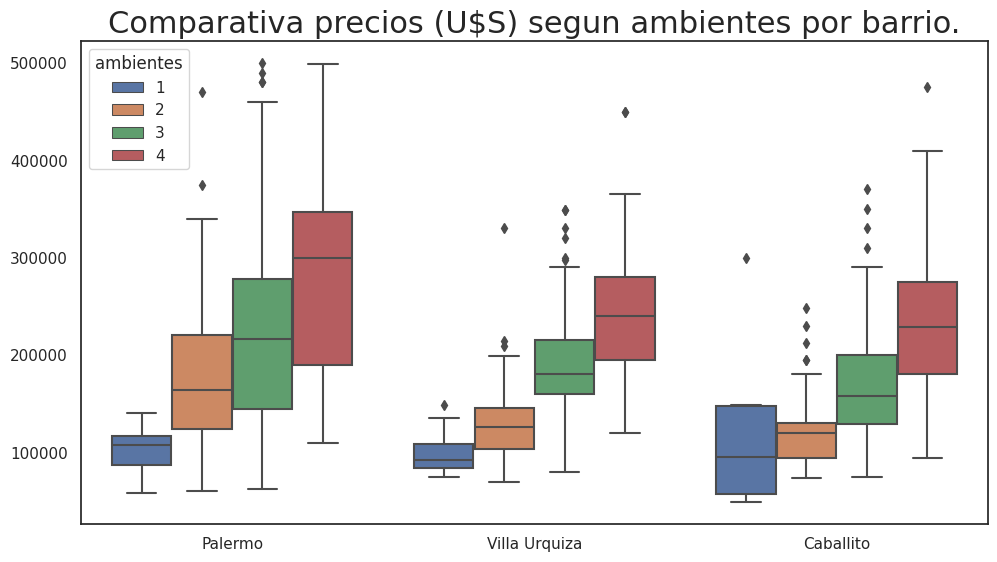

In [ ]:
df_barrios_4_amb = pd.concat([df_palermo, df_urquiza, df_caballito])
df_barrios_4_amb = df_barrios_4_amb[df_barrios_4_amb['ambientes']<5]


sns.set_style("white")
sns.set_style({"axes.facecolor": "none"})

g = sns.boxplot(data=df_barrios_4_amb, y='price', x='l3', hue=df_barrios_4_amb['ambientes'])
g.set_xlabel('')
g.set_ylabel('')
g.set_title('Comparativa precios (U$S) segun ambientes por barrio.', fontsize=22)

# Configurar el fondo transparente del gráfico
g.patch.set_alpha(0)

plt.show()



El grafico anterior nos muestra que Palermo tiene la mediana mas alta para todos ambientes analizados, aunque pudo observarse (grafico de evolución de los precios por barrio) que es el barrio que mayor descenso tuvo de precios y pareciera que esa tendencia continuará, de ser así se puede estimar que los precios tenderán a equipararse en el futuro (de continuar la proyección)

## Analizamos la correlacion entre la superficie y el precio por barrio.

Text(0.5, 1.0, 'Relacion entre la superficie y el precio (U$S) por barrio.')

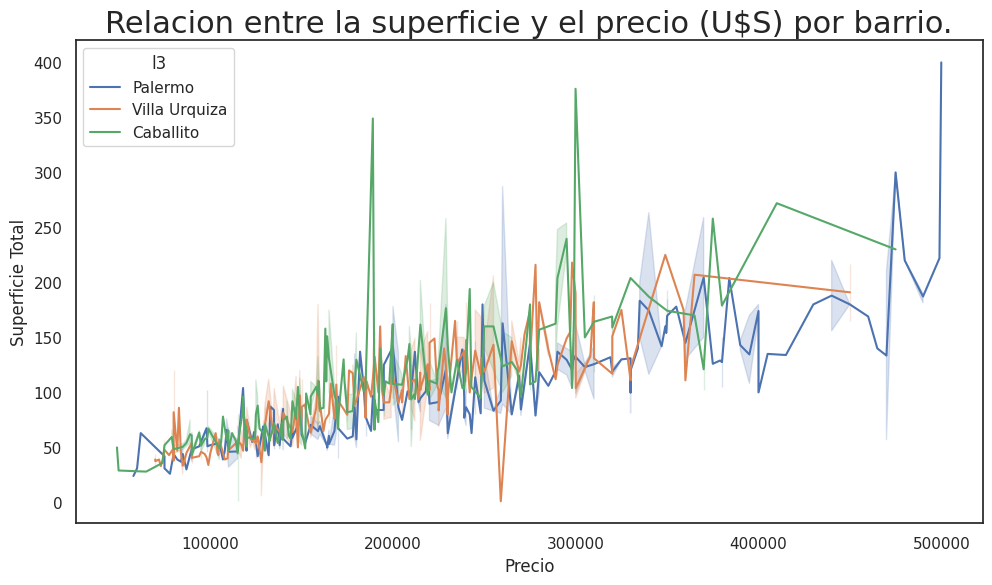

In [ ]:
g = sns.lineplot(data=df_barrios_4_amb, x="price", y="sup_total", hue= df_barrios_4_amb['l3'])
g.set_xlabel('Precio')
g.set_ylabel('Superficie Total')
g.set_title('Relacion entre la superficie y el precio (U$S) por barrio.',fontsize=22)

De este último gráfico podemos observar varios outliners que se podrán trabajar.

Para ello usamos la funcion que continua.

In [ ]:
def remove_outliers(data, x):
    q25 = np.percentile(data[x], 25)
    q75 = np.percentile(data[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1, (q75 + cut_off)
    data = data[(data[x] < upper) & (data[x] > lower)]
    print(f"Outliers of {x} are removed.\n")
    return data

Removemos outliers de la superficie.

In [ ]:
data = remove_outliers(df_barrios_4_amb, 'sup_total')

Outliers of sup_total are removed.



Removemos outliers del precio.

In [ ]:
data = remove_outliers(data, 'price')

Outliers of price are removed.



Text(0.5, 1.0, 'Relacion entre la superficie y el precio (U$S) por barrio.')

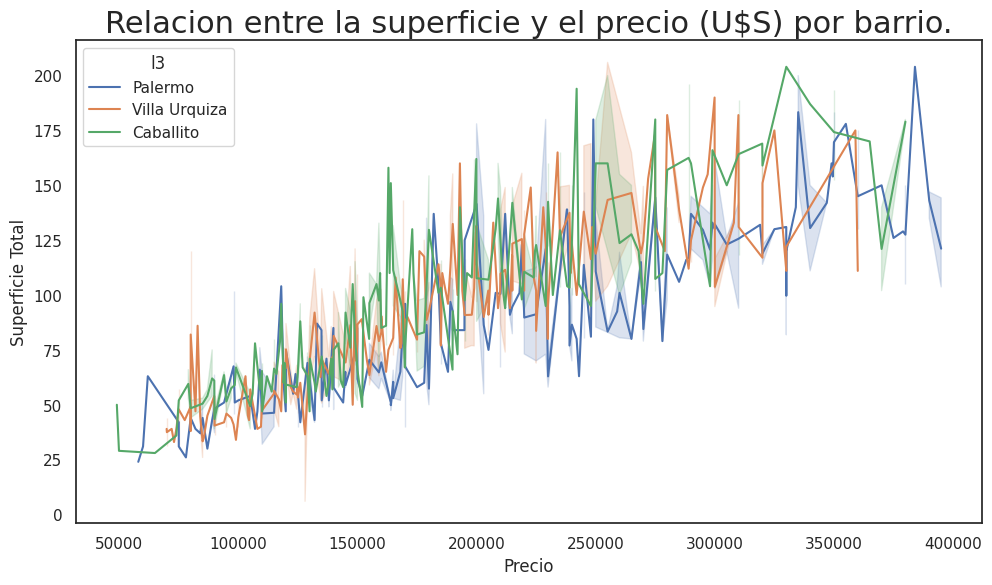

In [ ]:
g = sns.lineplot(data=data, x="price", y="sup_total", hue= data['l3'])
g.set_xlabel('Precio')
g.set_ylabel('Superficie Total')
g.set_title('Relacion entre la superficie y el precio (U$S) por barrio.',fontsize=22)

In [ ]:
data_promedio = data.groupby(['l3', 'sup_total'])['price'].mean().reset_index()

<ipython-input-26-5cc12b5e0dbe>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data_promedio['sup_total'][indice], data_promedio['price'][indice], c=colors[i], label=barrios[i])


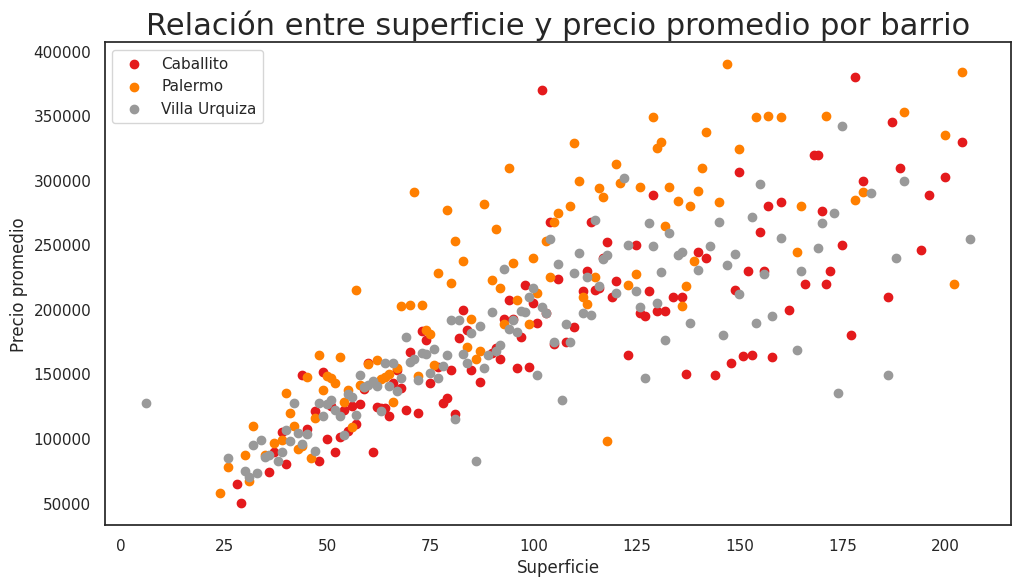

In [ ]:
barrios = np.unique(data_promedio['l3'])
colors = [plt.cm.Set1(i/float(len(barrios)-1)) for i in range(len(barrios))]

for i in range(len(barrios)):
    indice = data_promedio['l3'] == barrios[i]
    plt.scatter(data_promedio['sup_total'][indice], data_promedio['price'][indice], c=colors[i], label=barrios[i])

plt.xlabel('Superficie')
plt.ylabel('Precio promedio')
plt.title('Relación entre superficie y precio promedio por barrio', fontsize=22)
plt.legend()
plt.show()

## Relacion entre la cantidad de habitaciones y el precio

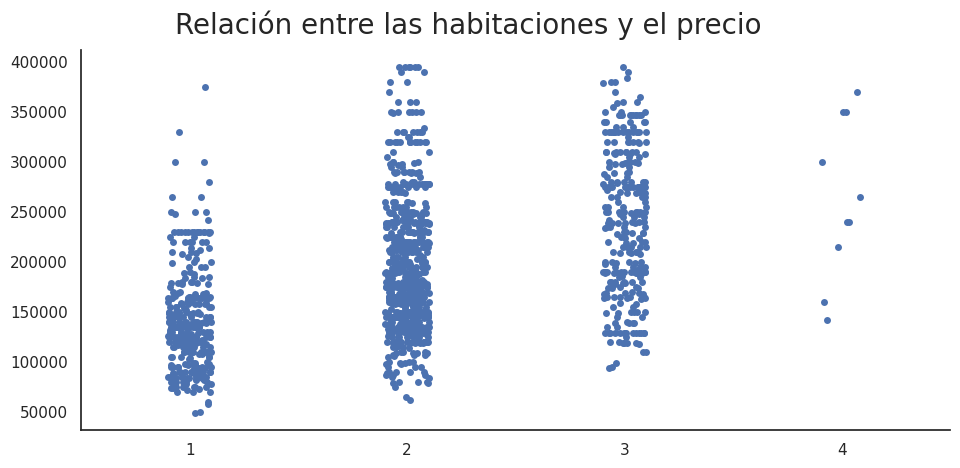

In [ ]:
sns.set_style("white")
sns.set_style({"axes.facecolor": "none"})

g = sns.catplot(x='habit', y='price', data=data, height=5, aspect=2)
g.set_axis_labels('', '')
g.fig.suptitle('Relación entre las habitaciones y el precio', fontsize=20)

g.fig.subplots_adjust(top=0.9)
g.fig.patch.set_alpha(0)

plt.show()

## Distribución de precios según el barrio

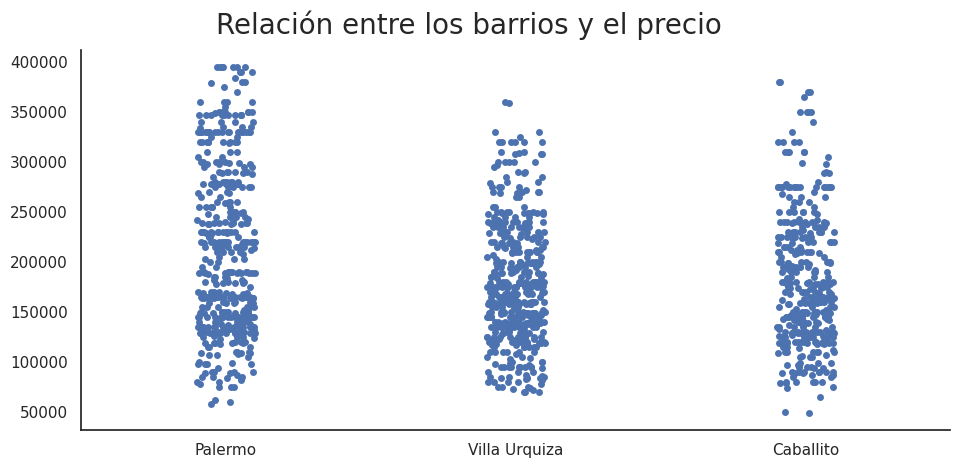

In [ ]:
sns.set_style("white")
sns.set_style({"axes.facecolor": "none"})

g = sns.catplot(x='l3', y='price', data=data, height=5, aspect=2)
g.set_axis_labels('', '')
g.fig.suptitle('Relación entre los barrios y el precio', fontsize=20)
g.fig.subplots_adjust(top=0.9)

# Configurar el fondo transparente de la figura
g.fig.patch.set_alpha(0)

plt.show()

## Distribución de precios según la cantidad de ambientes

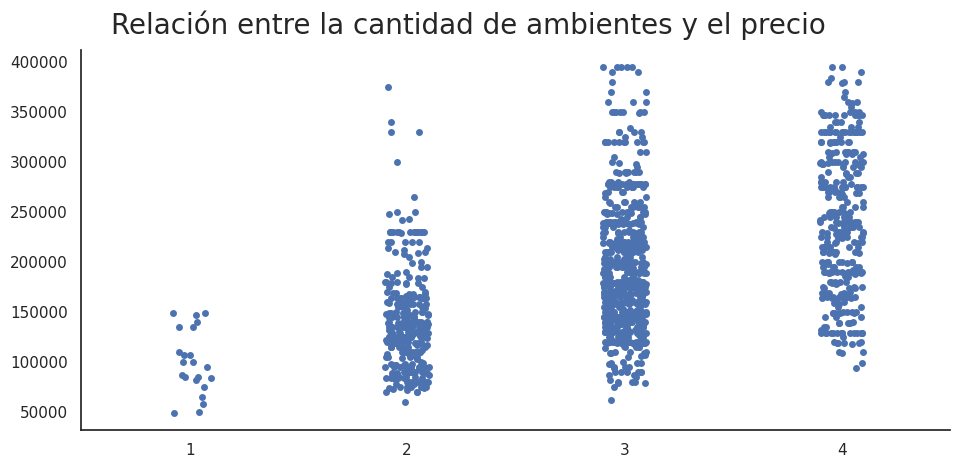

In [ ]:
sns.set_style("white")
sns.set_style({"axes.facecolor": "none"})

g = sns.catplot(x='ambientes', y='price', data=data, height=5, aspect=2)
g.set_axis_labels('', '')
g.fig.suptitle('Relación entre la cantidad de ambientes y el precio', fontsize=20)
g.fig.subplots_adjust(top=0.9)

# Configurar el fondo transparente de la figura
g.fig.patch.set_alpha(0)

plt.show()

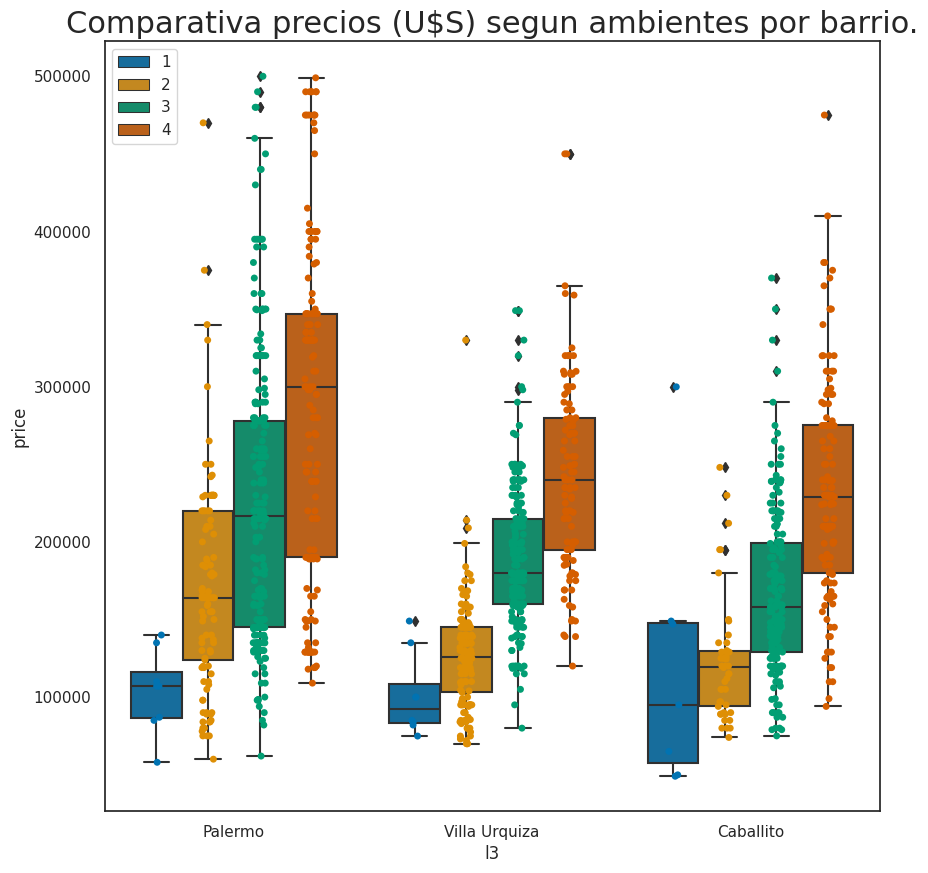

In [ ]:
df_barrios_4_amb = pd.concat([df_palermo, df_urquiza, df_caballito])
df_barrios_4_amb = df_barrios_4_amb[df_barrios_4_amb['ambientes'] < 5]

# Configurar el estilo y fondo del gráfico
sns.set_style("white")
sns.set_style({"axes.facecolor": "none"})

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 10))

# Gráfico de boxplot
g = sns.boxplot(data=df_barrios_4_amb, y='price', x='l3', hue=df_barrios_4_amb['ambientes'], palette='colorblind', ax=ax)
g.set_xlabel('')
g.set_ylabel('')
g.set_title('Comparativa precios (U$S) segun ambientes por barrio.', fontsize=22)
g.patch.set_alpha(0)

# Agregar strip plot
stripplot = sns.stripplot(data=df_barrios_4_amb, y='price', x='l3', hue='ambientes', dodge=True, palette='colorblind', ax=ax)

# Eliminar la leyenda de los puntos
handles, labels = stripplot.get_legend_handles_labels()
stripplot.legend(handles=handles[:-4], labels=labels[:-4])

# Mostrar el gráfico
plt.show()


# Crossvalidation y elección del modelo

Vamos a realizar la comparativa de los dos principales modelos de regresion aplicados para la prediccion de los precios en inmuebles.

In [6]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer

In [7]:
df_inmuebles_modelo = df_inmuebles_limpio.copy()
# Aplicar una transformación logarítmica a la variable 'precio'
df_inmuebles_modelo['price'] = np.log(df_inmuebles_modelo['price'])

In [8]:
# Identificar y manejar los outliers del 'precio'
q1 = df_inmuebles_modelo['price'].quantile(0.25)
q3 = df_inmuebles_modelo['price'].quantile(0.75)
iqr = q3 - q1
threshold = 1.5 * iqr

datos_sin_outliers = df_inmuebles_modelo[(df_inmuebles_modelo['price'] >= q1 - threshold) & (df_inmuebles_modelo['price'] <= q3 + threshold)]

In [8]:
datos_sin_outliers.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,ambientes,habit,banios,sup_total,sup_cub,price,currency,title,description,property_type,operation_type,cant_subtes,cant_plazas,sum,parrilla
0,vZLDZQLF4Zqic92Mjfme/A==,Propiedad,2021-06-17,2021-06-18,2021-06-17,-34.604685,-58.484070,Argentina,Capital Federal,Villa del Parque,3,2,1,86.0,67.0,12.100156,USD,PH Duplex Venta Villa del Parque 3 amb,Corredor Responsable: Hernan Perrone - C.U.C.I...,PH,Venta,0.0,2.0,False,True
1,sFXYZYNGPdzOda9lGx5XVg==,Propiedad,2021-06-17,2021-06-18,2021-06-17,-34.614384,-58.519939,Argentina,Capital Federal,Villa Devoto,3,2,1,125.0,75.0,12.149502,USD,VENTA PH 3 AMBIENTES CON QUINCHO Y TERRAZA DEVOTO,Corredor Responsable: Gustavo Guastello - C.U....,PH,Venta,0.0,5.0,False,True
2,ZMVxR3pboPObQ8PAxLadNQ==,Propiedad,2021-06-17,9999-12-31,2021-06-17,-34.569089,-58.494186,Argentina,Capital Federal,Villa Urquiza,4,3,2,120.0,100.0,12.301383,USD,"IDEAL 2 FAMILIAS, 2 PHs, PLANTA BAJA Y 1er PIS...","IDEAL 2 FAMILIAS, MODERNOS Y COMODOS PHs EN UB...",PH,Venta,0.0,1.0,False,False
3,FSRZ0TEZsqC9nZI+223GKw==,Propiedad,2021-06-17,2021-06-19,2021-06-17,-34.585437,-58.439905,Argentina,Capital Federal,Palermo,4,3,3,110.0,90.0,12.502467,USD,Venta P.H Palermo Hollywood 4 amb s/exp,Corredor Responsable: María Eugenia Blanco CUC...,PH,Venta,0.0,2.0,False,False
4,dXCip9bFbBpndRP543wrlg==,Propiedad,2021-06-17,9999-12-31,2021-06-17,-34.613027,-58.463019,Argentina,Capital Federal,Caballito,4,3,1,126.0,63.0,11.884489,USD,VENTA PH 4 AMBIENTES CON PATIO Y TERRAZA. MUY...,"Se trata de un departamento tipo PH, de 4 ambi...",PH,Venta,0.0,4.0,True,False


In [9]:
# Identificar y manejar los outliers de la 'surface_total', 'rooms' y 'bedrooms'
df_inmuebles_limpio = datos_sin_outliers[(datos_sin_outliers.sup_total < 500) & (datos_sin_outliers.ambientes < 10) & (datos_sin_outliers.habit < 9)]

In [10]:
# Seleccionamos las varibles que consideramos relevantes para participar del modelo
seleccion_variables = ['lat', 'lon', 'ambientes', 'habit', 'banios', 'sup_total', 'sup_cub', 'cant_subtes', 'cant_plazas','l3','price']

In [11]:
df_modelo = df_inmuebles_limpio[seleccion_variables]

In [12]:
# Cargamos la X unicamente con lo que nos interesa, tiramos las demás columnas
X = df_modelo.drop(['price'],axis=1)
y = df_modelo.price

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [15]:
# Definir variables categoricas y numericas
numeric_features = ['lat', 'lon', 'ambientes', 'habit', 'banios', 'sup_total', 'sup_cub', 'cant_subtes', 'cant_plazas']  # Lista de columnas numéricas
categorical_features = ['l3']  # solamente dejamos el barrio

In [16]:
# Modelos a utilizar
xgb_model = XGBRegressor()
rf_model = RandomForestRegressor()

In [17]:
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder_onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    sparse_threshold=0,  # Para asegurar que la salida sea densa (no dispersa).
    remainder='passthrough'  # Para mantener cualquier otra columna que no haya sido transformada.
)

In [19]:
# Pipeline final con el preprocesamiento y el modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', None),  # Placeholder para el modelo. Se definirá en cada iteración.
])

Entrenando y evaluando XGBoost...


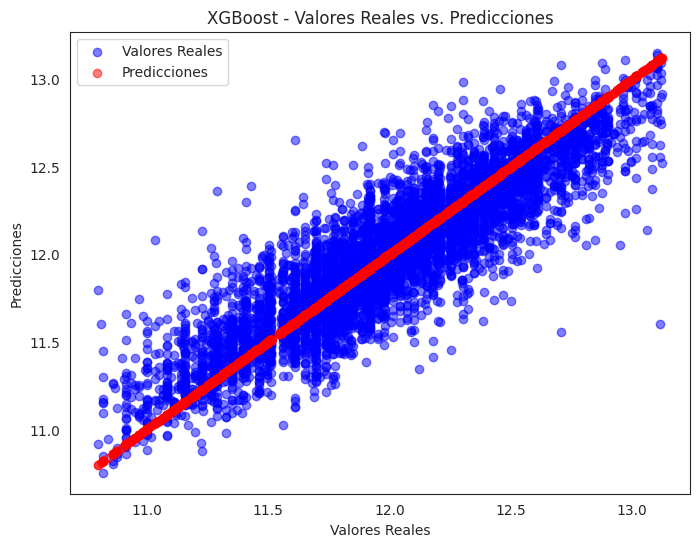

Entrenando y evaluando RandomForestRegressor...


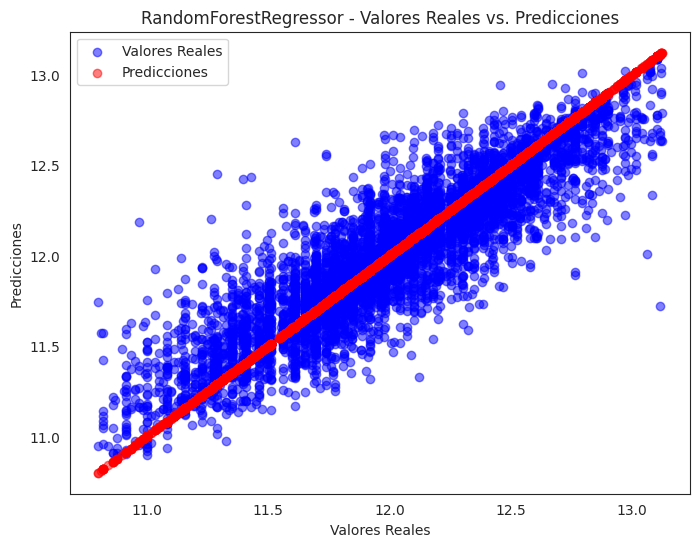

Proceso de validación cruzada finalizado.


In [33]:
n_folds = 5
cv = KFold(n_splits=n_folds, shuffle=True, random_state=0)

models = [xgb_model, rf_model]
model_names = ['XGBoost', 'RandomForestRegressor']

metrics = {
    'MAE': mean_absolute_error,
    'MSE': mean_squared_error,
    'R2': r2_score
}

results = {}

for model, model_name in zip(models, model_names):
    print(f"Entrenando y evaluando {model_name}...")

    # Establecer el modelo en el pipeline para esta iteración
    pipeline.set_params(model=model)

    # Realizar la validación cruzada y obtener las predicciones
    y_pred = cross_val_predict(pipeline, X_train, y_train, cv=cv)

    # Calcular métricas de rendimiento
    model_metrics = {}
    for metric_name, metric_func in metrics.items():
        metric_value = metric_func(y_train, y_pred)
        model_metrics[metric_name] = metric_value

    results[model_name] = model_metrics

    # Crear gráfica de valores reales vs. predicciones para comparar los modelos
    plt.figure(figsize=(8, 6))
    plt.scatter(y_train, y_pred, color='blue', alpha=0.5, label='Valores Reales')
    plt.scatter(y_train, y_train, color='red', alpha=0.5, label='Predicciones')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title(f'{model_name} - Valores Reales vs. Predicciones')
    plt.legend()
    plt.show()

print("Proceso de validación cruzada finalizado.")

In [34]:
print("Resultados de métricas:")

# Mostrar los resultados de las métricas para ambos modelos
for model_name, metrics_dict in results.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics_dict.items():
        print(f"  {metric_name}: {metric_value}")

Resultados de métricas:
XGBoost:
  MAE: 0.15456680667538764
  MSE: 0.04309814599520584
  R2: 0.7913207135633458
RandomForestRegressor:
  MAE: 0.14410846676220734
  MSE: 0.040766579919853496
  R2: 0.8026100517390194


In [36]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [37]:
kf = KFold(n_splits=3)

# Sequential Forward Selection(sfs), aquí solicitamos las X variables que mejor interactuan con el modelo
sfs = SFS(RandomForestRegressor(),
          k_features=6,
          forward=True,
          scoring = 'r2',
          cv = kf)

In [38]:
# Crear el pipeline con el selector de características y el modelo
pipeline_sfs = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', sfs),
])


In [39]:
pipeline_sfs.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'lon', 'ambientes',
                                                   'habit', 'banios',
                                                   'sup_total', 'sup_cub',
                                                   'cant_subtes',
                                                   'cant_plazas']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder_onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['l3'])])),
                ('feature_selection',
                 SequentialFeatureSelector(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                                           estimator=RandomForestRegressor(),
                                           k_features=(6, 6), scoring='r2'))])

In [40]:
sfs_feature_selection = pipeline_sfs.named_steps['feature_selection']

In [41]:
best_selected_features = sfs_feature_selection.k_feature_names_

feature_names = list(X_train.columns)

# Obtener los índices de las características seleccionadas
selected_indices = sfs_feature_selection.k_feature_names_

# Obtener los nombres de las características seleccionadas
selected_features = [feature_names[int(i)] for i in selected_indices]


In [51]:
# Vamos a probar el modelo con estos cuatro campos
selected_features

['lat', 'lon', 'ambientes', 'banios', 'sup_total', 'sup_cub']

# HyperTunning

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
rf_param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 5, 10]
}

In [54]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', rf_model)  # Modelo RandomForestRegressor
])

In [55]:
# Realizar GridSearchCV para ambos modelos
rf_grid_search = GridSearchCV(rf_pipeline, param_grid=rf_param_grid, cv=cv, scoring='neg_mean_absolute_error', verbose=1)

In [99]:
# Entrenar los modelos con GridSearch
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['lat',
                                                                          'lon',
                                                                          'ambientes',
                                                                          'habit',
                                                                          'banios',
                                                                          'sup_total',
                                                                          'sup_cub',
                                                                          'cant_subtes',
                                                                          'cant_plazas...
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder_onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['l3'])])),
                                       ('model',
                                        RandomForestRegressor(n_estimators={'model__max_depth': None,
                                                                            'model__n_estimators': 200}))]),
             param_grid={'model__max_depth': [None, 5, 10],
                         'model__n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_error', verbose=1)

In [100]:
# Obtener los mejores modelos y resultados
best_rf_model = rf_grid_search.best_estimator_

In [101]:
print("Mejores hiperparámetros para RandomForest:")
print(rf_grid_search.best_params_)
print("Mejor MAE para RandomForest:", -rf_grid_search.best_score_)

Mejores hiperparámetros para RandomForest:
{'model__max_depth': None, 'model__n_estimators': 200}
Mejor MAE para RandomForest: 0.14200129385191165


# Entrenamiento del Modelo RandomForest

In [20]:
# Seleccionamos las variables que mejor interactuan con el modelo
columnas_seleccionadas_final = ['lat', 'lon', 'ambientes', 'banios', 'sup_total', 'sup_cub']

X_train_reducido = X_train[columnas_seleccionadas_final]
X_test_reducido = X_test[columnas_seleccionadas_final]

In [21]:
preprocessor_final = ColumnTransformer(
        transformers=[
            # selecciono las columnas numericas que usaré
            ('select', 'passthrough', columnas_seleccionadas_final)
        ],
        remainder='drop'  # las que no especifiqué que no se consideren
    )

In [22]:
pipeline_final = Pipeline([
    ('preprocessor', preprocessor_final),
    ('model', RandomForestRegressor(max_depth=None, n_estimators=200))
])

In [23]:
X_train_reducido

,lat,lon,ambientes,banios,sup_total,sup_cub
3414,-34.605400,-58.503300,4,2,104.0,80.0
1705,-34.607272,-58.410402,3,1,90.0,90.0
2073,-34.639923,-58.488541,3,2,98.0,70.0
3923,-34.592493,-58.443376,3,1,51.0,43.0
4559,-34.620169,-58.422332,3,1,75.0,75.0
...,...,...,...,...,...,...
4389,-34.645176,-58.472313,4,3,237.0,120.0
7917,-34.548475,-58.460752,2,1,34.0,34.0
4875,-34.610504,-58.471682,4,2,110.0,80.0
3276,-34.639398,-58.433383,2,1,33.0,33.0


In [24]:
# Entrenar el modelo utilizando el pipeline
pipeline_final.fit(X_train_reducido, y_train)

# Hacer predicciones en datos de prueba utilizando el pipeline entrenado
y_pred_train = pipeline_final.predict(X_train_reducido)

y_pred_test=pipeline_final.predict(X_test_reducido)


In [25]:
print('performance entrenamiento r2: ', r2_score(y_pred_train, y_train))
print('performance testeo r2: ', r2_score(y_pred_test, y_test))

print('performance entrenamiento mae: ', mean_absolute_error(y_pred_train, y_train))
print('performance testeo mae: ', mean_absolute_error(y_pred_test, y_test))

print('performance entrenamiento mse: ', mean_squared_error(y_pred_train, y_train))
print('performance testeo mse: ', mean_squared_error(y_pred_test, y_test))


performance entrenamiento r2:  0.9693302323527049
performance testeo r2:  0.7760571504481338
performance entrenamiento mae:  0.05296486778729045
performance testeo mae:  0.1317161855074704
performance entrenamiento mse:  0.005635199748169292
performance testeo mse:  0.03590276903386025


# Conclusiones


El modelo RandomForestRegressor alcanzó un coeficiente de determinación (R2) de alrededor del 77.5%, lo que sugiere que puede explicar una parte considerable de la variabilidad en los datos de prueba.

En términos de precisión, el error absoluto medio (MAE) observado en los datos de prueba fue de aproximadamente 0.132. Esto indica que las predicciones del modelo tienen una desviación promedio de alrededor de 0.132 unidades con respecto a los valores reales en el conjunto de prueba.

Adicionalmente, el modelo exhibió un valor de error cuadrado medio (MSE) cercano a 0.036 en los datos de prueba. Esta métrica refleja que las predicciones del modelo poseen errores cuadrados promedio moderados en este conjunto.


El desempeño exhibido por el modelo RandomForestRegressor en la predicción de datos de prueba nos brinda la confianza necesaria para considerar su implementación en producción.

Los resultados sugieren que el modelo tiene el potencial de generar predicciones precisas y útiles en situaciones del mundo real.

A medida que continuamos afinando y optimizando el modelo, esperamos que su desempeño en producción alcance nuevos niveles de excelencia, contribuyendo significativamente a nuestras aplicaciones y objetivos.

# Implementacion del modelo

In [26]:
# hacemos una prueba para verificar como se va a interactuar con el modelo
data = {
    'lat': [-34.60],
    'lon': [-58.38],
    'ambientes': [4],
    'banios': [2],
    'sup_total': [50],
    'sup_cub': [50]
}


In [27]:
df_prediccion = pd.DataFrame(data)

In [28]:
prediccion = pipeline_final.predict(df_prediccion)

In [34]:
print('El valor de la propiedad es: U$S',np.round(np.exp(prediccion),2))

El valor de la propiedad es: U$S [127388.69]


## Exportamos y guardamos el modelo

In [36]:
import pickle
import joblib


In [37]:
# Guardar el modelo en un archivo pickle
with open('modelo_entrenado.pkl', 'wb') as archivo:
    pickle.dump(pipeline_final, archivo)

In [38]:
# Descargamos el modelo
from google.colab import files
files.download('modelo_entrenado.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>